In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("ex3.csv", index_col=0)
df

,post1,post2,post3,post4
word,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


In [3]:
U, s, VT = np.linalg.svd(df)

In [4]:
c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
V_df = pd.DataFrame(VT, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


In [5]:
A_approx = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])
print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(df - A_approx)

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946

Error from actual value:

          post1     post2     post3     post4
word                                         
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


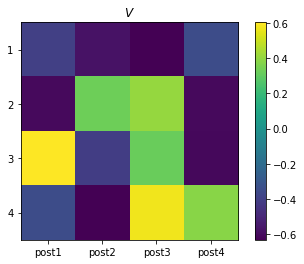

In [7]:
import matplotlib.pyplot as plt
plt.imshow(VT, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar()

In [8]:
#cau2
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
U, s, VT = np.linalg.svd(X)

In [11]:
X1 = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])
X1[0:5]

matrix([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
        [4.74974728, 3.19172985, 1.46006954, 0.25494146],
        [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
        [4.61834831, 3.08439659, 1.46266616, 0.26731753],
        [5.07896131, 3.5005194 , 1.36352353, 0.18323972]])

In [12]:
X1.shape

(150, 4)

In [13]:
print("A calculated using only the first two components:\n")
Xnew = pd.DataFrame(X1, index = X.index, columns=X.columns)
print(Xnew.head())

A calculated using only the first two components:

   sepal_length  sepal_width  petal_length  petal_width
0      5.099453     3.500508      1.400946     0.198406
1      4.749747     3.191730      1.460070     0.254941
2      4.690479     3.210891      1.308639     0.191555
3      4.618348     3.084397      1.462666     0.267318
4      5.078961     3.500519      1.363524     0.183240


In [14]:
print("\nError from actual value:\n")
print((X - X1).head())


Error from actual value:

   sepal_length  sepal_width  petal_length  petal_width
0      0.000547    -0.000508     -0.000946     0.001594
1      0.150253    -0.191730     -0.060070    -0.054941
2      0.009521    -0.010891     -0.008639     0.008445
3     -0.018348     0.015603      0.037334    -0.067318
4     -0.078961     0.099481      0.036476     0.016760


In [15]:
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:X.shape[1], :X.shape[1]] = np.diag(s)
Sigma.shape

(150, 4)

In [16]:
X_c = U.dot(Sigma.dot(VT))
X_c[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
X_c_new = pd.DataFrame(X_c, columns=X.columns)
X_c_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#cau3
A = np.random.randint(1,11,(4,6))

In [19]:
U, s, VT = np.linalg.svd(A)

In [20]:
d = 1.0/s

In [21]:
D = np.zeros(A.shape)

In [22]:
A.shape[1]

6

In [23]:
np.diag(d)

array([[0.03713392, 0.        , 0.        , 0.        ],
       [0.        , 0.15318262, 0.        , 0.        ],
       [0.        , 0.        , 0.18057673, 0.        ],
       [0.        , 0.        , 0.        , 0.20621886]])

In [24]:
D[:A.shape[0],:A.shape[0]] = np.diag(d)

In [25]:
D

array([[0.03713392, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.15318262, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18057673, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.20621886, 0.        ,
        0.        ]])

In [27]:
B = VT.dot(D.T).dot(U.T)

In [28]:
B.shape

(6, 4)

In [29]:
B

array([[ 0.00724275,  0.01450612,  0.06947657, -0.07643725],
       [ 0.02572436,  0.10571344, -0.1049482 , -0.05193983],
       [-0.00327752, -0.00203965, -0.01551339,  0.06724293],
       [ 0.02187051, -0.0121355 ,  0.07285479, -0.08046676],
       [-0.11870498,  0.03861627,  0.06999996,  0.0627412 ],
       [ 0.0580101 , -0.07592412, -0.00427724,  0.11289187]])

In [32]:
A.shape[0]

4

In [33]:
Sigma

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.